In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.impute import KNNImputer
import scipy.stats as stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,precision_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier


In [102]:
df =pd.read_csv('diabetes2(my_work) .csv')

# Problem Statement
- **Predict if patient will have diabetes on basis of various attributes**

    -Pregnancies - No. of times the person was pregnant
    - Glucose - Glucose concentration level
    - BloodPressure - Diastolic Blood Pressure(mm Hg),measures the pressure in your arteries when your heart rests between beats.
    - Skin Thickness - Triceps Skin fold thickness(mm)
    - Insulin 2- Hour serum insulin,
         If your blood glucose level is still high 2 hours after you've eaten.
       - For those who don't have diabetes: less than 140 mg/dL
       - For those who have diabetes: less than 180 mg/dL 
    - BMI Body mass index(weight) (weightin kg/(height in m)^2
    - DiabetesPedigree Function - Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
    - Age 
    - Outcome : class variable (0 or 1)                         

## [1] Read the Dataset

In [103]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [104]:
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [105]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
745,12,100,84,33,105,30.0,0.488,46,0
278,5,114,74,0,0,24.9,0.744,57,0
504,3,96,78,39,0,37.3,0.238,40,0
168,4,110,66,0,0,31.9,0.471,29,0
393,4,116,72,12,87,22.1,0.463,37,0


## [2] Shape of Data

In [106]:
df.shape

(768, 9)

## [3] Attributes of data 

In [107]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## [4] Data types of columns

In [108]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## [5] Unique values of each columns

In [109]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

## [6] Check null values

In [110]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [111]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## [7] Percentage of people having diabetes

In [113]:
sum(df.Outcome)/df.shape[0]*100

34.89583333333333

## [8] Descriptive Statistics

### [A] Measures of Central Tendency

- 8 point summary 
  -- MEAN

In [114]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- **Observations**
 - Glucose,BMI,SkinThickess,Insulin,Glucose has zero values - these are equivalent to missing values.
 
    

- **Percentage of Zero values**

In [115]:
print('Percentage of zero values in Glucose' ,len(df[df.Glucose==0])/len(df)*100)
print('Percentage of zero values in BMI' ,len(df[df.BMI==0])/len(df)*100)
print('Percentage of zero values in SkinThickness' ,len(df[df.SkinThickness==0])/len(df)*100)
print('Percentage of zero values in Insulin' ,len(df[df.Insulin==0])/len(df)*100)
print('Percentage of zero values in BloodPressure' ,len(df[df.BloodPressure==0])/len(df)*100)
print('Percentage of zero values in Age' ,len(df[df.Age==0])/len(df)*100)

Percentage of zero values in Glucose 0.6510416666666667
Percentage of zero values in BMI 1.4322916666666665
Percentage of zero values in SkinThickness 29.557291666666668
Percentage of zero values in Insulin 48.69791666666667
Percentage of zero values in BloodPressure 4.557291666666666
Percentage of zero values in Age 0.0


- **MEDIAN**

In [116]:
for col in df.columns:
    print(f"Median of {col} is {np.median(df[col])} ")

Median of Pregnancies is 3.0 
Median of Glucose is 117.0 
Median of BloodPressure is 72.0 
Median of SkinThickness is 23.0 
Median of Insulin is 30.5 
Median of BMI is 32.0 
Median of DiabetesPedigreeFunction is 0.3725 
Median of Age is 29.0 
Median of Outcome is 0.0 


## [B] Measure of Shape Distribution

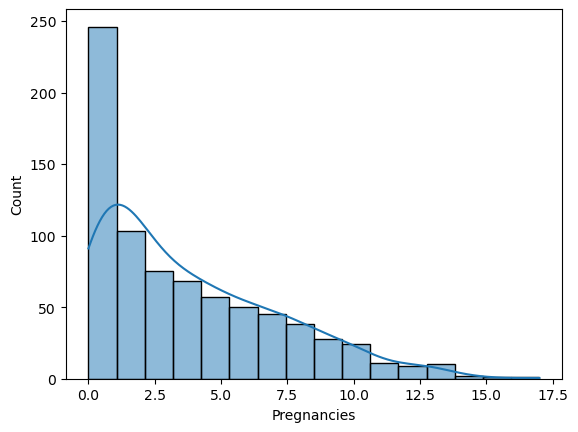

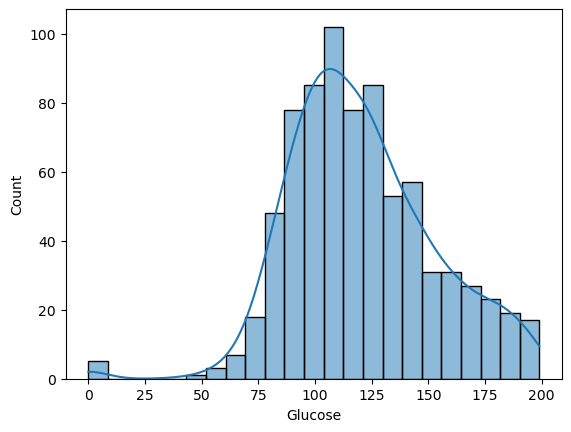

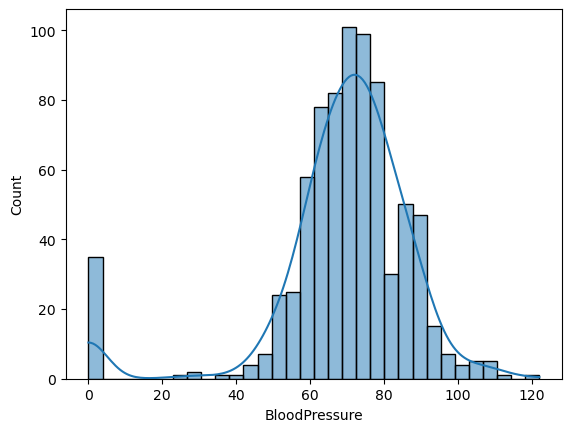

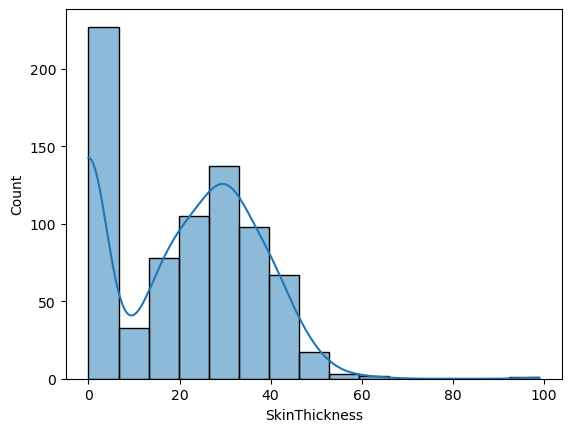

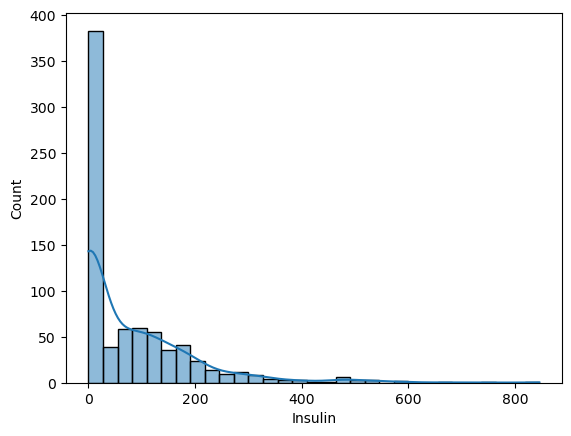

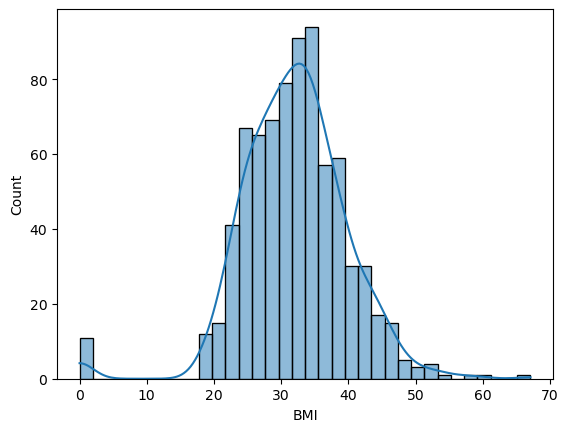

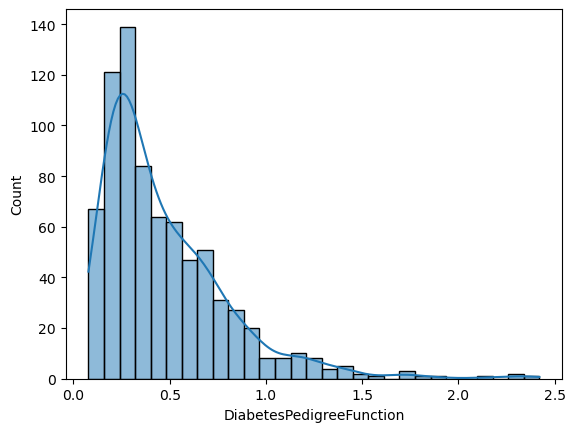

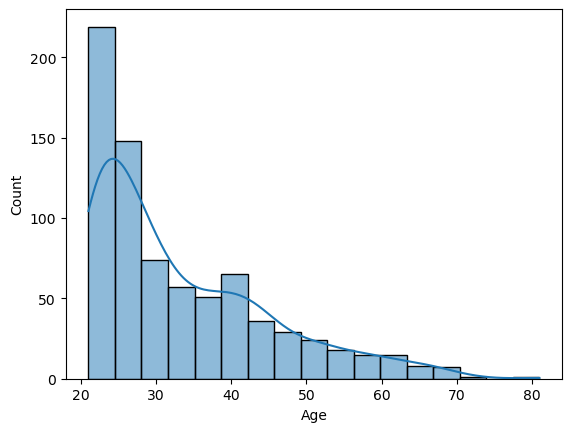

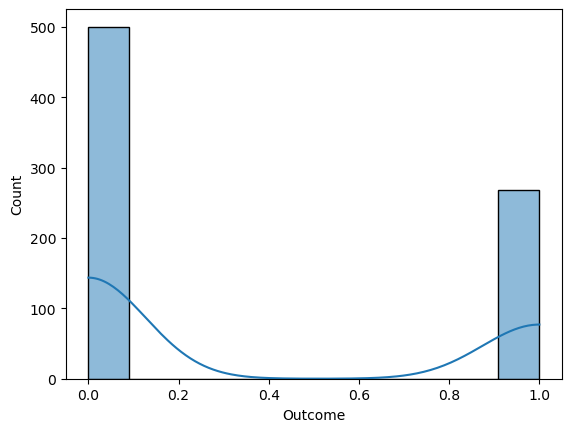

In [117]:
for col in df.columns:
    sns.histplot(data = df[col],kde = True)
    plt.show()
    

- **Skewness**

In [118]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

- **Kurtosis**

In [119]:
df.kurtosis()

Pregnancies                 0.159220
Glucose                     0.640780
BloodPressure               5.180157
SkinThickness              -0.520072
Insulin                     7.214260
BMI                         3.290443
DiabetesPedigreeFunction    5.594954
Age                         0.643159
Outcome                    -1.600930
dtype: float64

### Observations 
- BMI - normally distributed
- SkinThickness - left skewed
- Insulin - Left skewed 
- Glucose  Normally distributed
-  Blood Pressure , left skewed

## [C] Measure of Dispersion

- **Standard Deviation**

In [120]:
for col in df.columns:
    print(f"Standard deviation of {col} is {df[col].std()}")

Standard deviation of Pregnancies is 3.3695780626988623
Standard deviation of Glucose is 31.97261819513622
Standard deviation of BloodPressure is 19.355807170644777
Standard deviation of SkinThickness is 15.952217567727677
Standard deviation of Insulin is 115.24400235133837
Standard deviation of BMI is 7.8841603203754405
Standard deviation of DiabetesPedigreeFunction is 0.33132859501277484
Standard deviation of Age is 11.76023154067868
Standard deviation of Outcome is 0.4769513772427971


In [121]:
df['Insulin'].std()

115.24400235133837

- **Coefficient Of variation**

In [122]:
for col in df.columns:
    print(f"Coefficient of variation of {col} is {df[col].std()/df[col].mean()}")

Coefficient of variation of Pregnancies is 0.8763413315789794
Coefficient of variation of Glucose is 0.2644670347331052
Coefficient of variation of BloodPressure is 0.2800908165555968
Coefficient of variation of SkinThickness is 0.776775494041013
Coefficient of variation of Insulin is 1.4441698561796799
Coefficient of variation of BMI is 0.2464371670695247
Coefficient of variation of DiabetesPedigreeFunction is 0.7021513764305601
Coefficient of variation of Age is 0.35378815555804094
Coefficient of variation of Outcome is 1.3667860362778665


## [9] Fill zero values for Glucose,BMI,SkinThickess,Insulin

### [A] BMI
- **Age of people where BMI is zero**

In [123]:
print('Age of people where BMI is zero', df.loc[(df.BMI == 0),['Age']])

Age of people where BMI is zero      Age
9     54
49    24
60    21
81    22
145   21
371   21
426   25
494   22
522   26
684   69
706   30


- Fill with mean for age 21,22,24,25,26,30,54,69

In [124]:
df.loc[(df.Age==21)&(df.BMI!=0)].mean()

Pregnancies                   1.100000
Glucose                     108.666667
BloodPressure                66.916667
SkinThickness                19.550000
Insulin                      75.833333
BMI                          29.208333
DiabetesPedigreeFunction      0.412067
Age                          21.000000
Outcome                       0.083333
dtype: float64

In [125]:
df.loc[(df.Age==21)&(df.BMI==0),['BMI']]=29.20

In [126]:
df.loc[(df.Age==24)&(df.BMI!=0)].mean()

Pregnancies                   1.777778
Glucose                     118.177778
BloodPressure                66.400000
SkinThickness                26.511111
Insulin                      89.977778
BMI                          33.293333
DiabetesPedigreeFunction      0.395533
Age                          24.000000
Outcome                       0.177778
dtype: float64

In [127]:
df.loc[(df.Age==24)&(df.BMI==0),['BMI']]=33.29

In [128]:
df.loc[(df.Age==22)&(df.BMI!=0)].mean()

Pregnancies                   1.528571
Glucose                     109.100000
BloodPressure                65.542857
SkinThickness                21.071429
Insulin                      76.614286
BMI                          30.352857
DiabetesPedigreeFunction      0.438986
Age                          22.000000
Outcome                       0.157143
dtype: float64

In [129]:
df.loc[(df.Age==22)&(df.BMI==0),['BMI']]=30.35

In [130]:
df.loc[(df.Age==25)&(df.BMI!=0)].mean()

Pregnancies                   1.808511
Glucose                     110.425532
BloodPressure                60.936170
SkinThickness                24.468085
Insulin                      84.659574
BMI                          32.623404
DiabetesPedigreeFunction      0.607830
Age                          25.000000
Outcome                       0.297872
dtype: float64

In [131]:
df.loc[(df.Age==25)&(df.BMI==0),['BMI']]=32.62

In [132]:
df.loc[(df.Age==26)&(df.BMI!=0)].mean()

Pregnancies                   1.843750
Glucose                     118.343750
BloodPressure                66.187500
SkinThickness                24.406250
Insulin                      93.718750
BMI                          36.006250
DiabetesPedigreeFunction      0.420469
Age                          26.000000
Outcome                       0.250000
dtype: float64

In [133]:
df.loc[(df.Age==26)&(df.BMI==0),['BMI']]=36.00

In [134]:
df.loc[(df.Age==30)&(df.BMI!=0)].mean()

Pregnancies                   3.30000
Glucose                     122.65000
BloodPressure                68.10000
SkinThickness                19.85000
Insulin                      86.80000
BMI                          31.53500
DiabetesPedigreeFunction      0.37255
Age                          30.00000
Outcome                       0.25000
dtype: float64

In [135]:
df.loc[(df.Age==30)&(df.BMI==0),['BMI']]=31.53

In [136]:
df.loc[(df.Age==54)&(df.BMI!=0)].mean()

Pregnancies                   6.8000
Glucose                     143.4000
BloodPressure                88.0000
SkinThickness                10.6000
Insulin                      73.2000
BMI                          36.9600
DiabetesPedigreeFunction      0.5122
Age                          54.0000
Outcome                       0.6000
dtype: float64

In [137]:
df.loc[(df.Age==54)&(df.BMI==0),['BMI']]=36.96

In [138]:
df.loc[(df.Age==69)&(df.BMI!=0)].mean()

Pregnancies                   5.000
Glucose                     132.000
BloodPressure                80.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          26.800
DiabetesPedigreeFunction      0.186
Age                          69.000
Outcome                       0.000
dtype: float64

In [139]:
df.loc[(df.Age==69)&(df.BMI==0),['BMI']]=26.8

In [140]:
df['BMI'].describe()

count    768.000000
mean      32.442448
std        6.885285
min       18.200000
25%       27.500000
50%       32.250000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

### [B] **SKIN THICKNESS**
- 
  -- It is bimodal so we will fill the zero values with Knn Imputer

In [141]:
imputer = KNNImputer(n_neighbors = 5, missing_values = 0)

In [142]:
df['SkinThickness'] = imputer.fit_transform(df[['SkinThickness']])

In [143]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,29.153420,79.799479,32.442448,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,8.790942,115.244002,6.885285,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,25.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,30.500000,32.250000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## [C] **Glucose**
-  - Fill zero values with mean of age, since its normally distribute

In [144]:
for i in (df.Glucose.index):
    if(df.Glucose[i]==0):
        age = df.Age[i]
        df.Glucose[i]=df.loc[(df.Age==age)&(df.Glucose!=0)].median()[1]

In [145]:
## check for nan
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

## [D] **Insulin**
-  Linear regression imputation.
- Insulin has 48 percent missing values but since it is important factor in determination of diabetes , we will fill it with linear regression imputation

In [146]:
### Check Correlation 
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129929,0.141282,0.082989,-0.073535,0.024502,-0.033523,0.544341,0.221898
Glucose,0.129929,1.000000,0.159111,0.194327,0.331612,0.234376,0.138251,0.268732,0.495189
BloodPressure,0.141282,0.159111,1.000000,0.123444,0.088933,0.185028,0.041265,0.239528,0.065068
SkinThickness,0.082989,0.194327,0.123444,1.000000,0.112974,0.542463,0.100966,0.127872,0.215299
Insulin,-0.073535,0.331612,0.088933,0.112974,1.000000,0.185532,0.185071,-0.042163,0.130548
BMI,0.024502,0.234376,0.185028,0.542463,0.185532,1.000000,0.150039,0.025908,0.314482
DiabetesPedigreeFunction,-0.033523,0.138251,0.041265,0.100966,0.185071,0.150039,1.000000,0.033561,0.173844
Age,0.544341,0.268732,0.239528,0.127872,-0.042163,0.025908,0.033561,1.000000,0.238356
Outcome,0.221898,0.495189,0.065068,0.215299,0.130548,0.314482,0.173844,0.238356,1.000000


- Taking Glucose and BMI as features because , since and Insulin as label

In [147]:
known = df[df['Insulin'] != 0]  #known are values that are non-zero
unknown = df[df['Insulin'] == 0] #unknown are the zero values

model= LinearRegression()   #fit the model
model.fit(known[['DiabetesPedigreeFunction', 'BMI']], known['Insulin'])

#predict for the unknown 
unknown['Insulin'] = model.predict(unknown[['DiabetesPedigreeFunction','BMI']]) 

In [148]:
df_imputed = pd.concat([known,unknown],axis=0)
df_imputed.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.648438,69.105469,29.153420,151.523920,32.442448,0.471876,33.240885,0.348958
std,3.369578,30.456470,19.355807,8.790942,87.215492,6.885285,0.331329,11.760232,0.476951
min,0.000000,44.000000,0.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,62.000000,25.000000,109.916580,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,140.000000,32.250000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,170.472567,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [149]:
df = df_imputed
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.648438,69.105469,29.153420,151.523920,32.442448,0.471876,33.240885,0.348958
std,3.369578,30.456470,19.355807,8.790942,87.215492,6.885285,0.331329,11.760232,0.476951
min,0.000000,44.000000,0.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,62.000000,25.000000,109.916580,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.153420,140.000000,32.250000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,170.472567,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## [E] Blood Pressure
- Fill all zero values with median

In [150]:
for i in (df.BloodPressure.index):
    if (df.BloodPressure[i]==0):
        age = df.Age[i]
        df.BloodPressure[i] = df.loc[(df.Age==age) & (df.BloodPressure!=0)].median()[2]

In [151]:
df.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure                True
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [152]:
df['BloodPressure'].fillna(df['BloodPressure'].median(),inplace =True)

## [10]  **Measures of Association**
- [A] **Correlation**

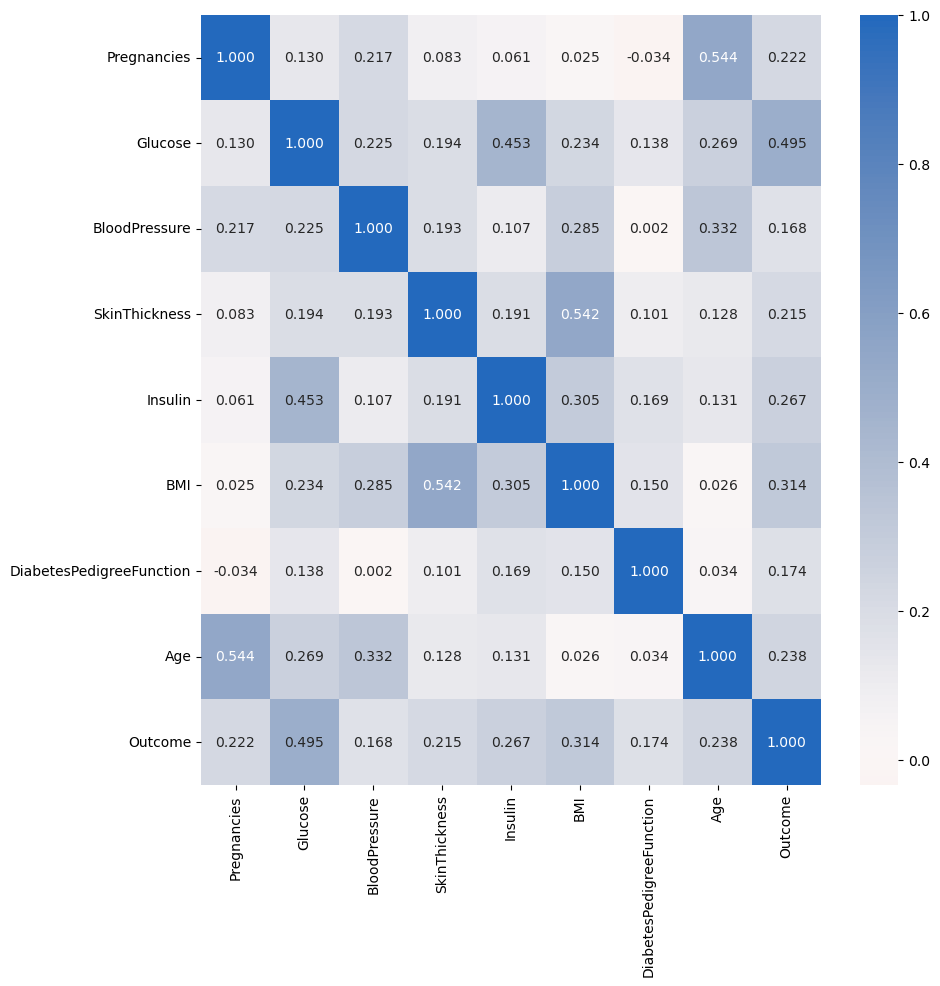

In [153]:
plt.figure(figsize = [10, 10])
sns.heatmap(df.corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

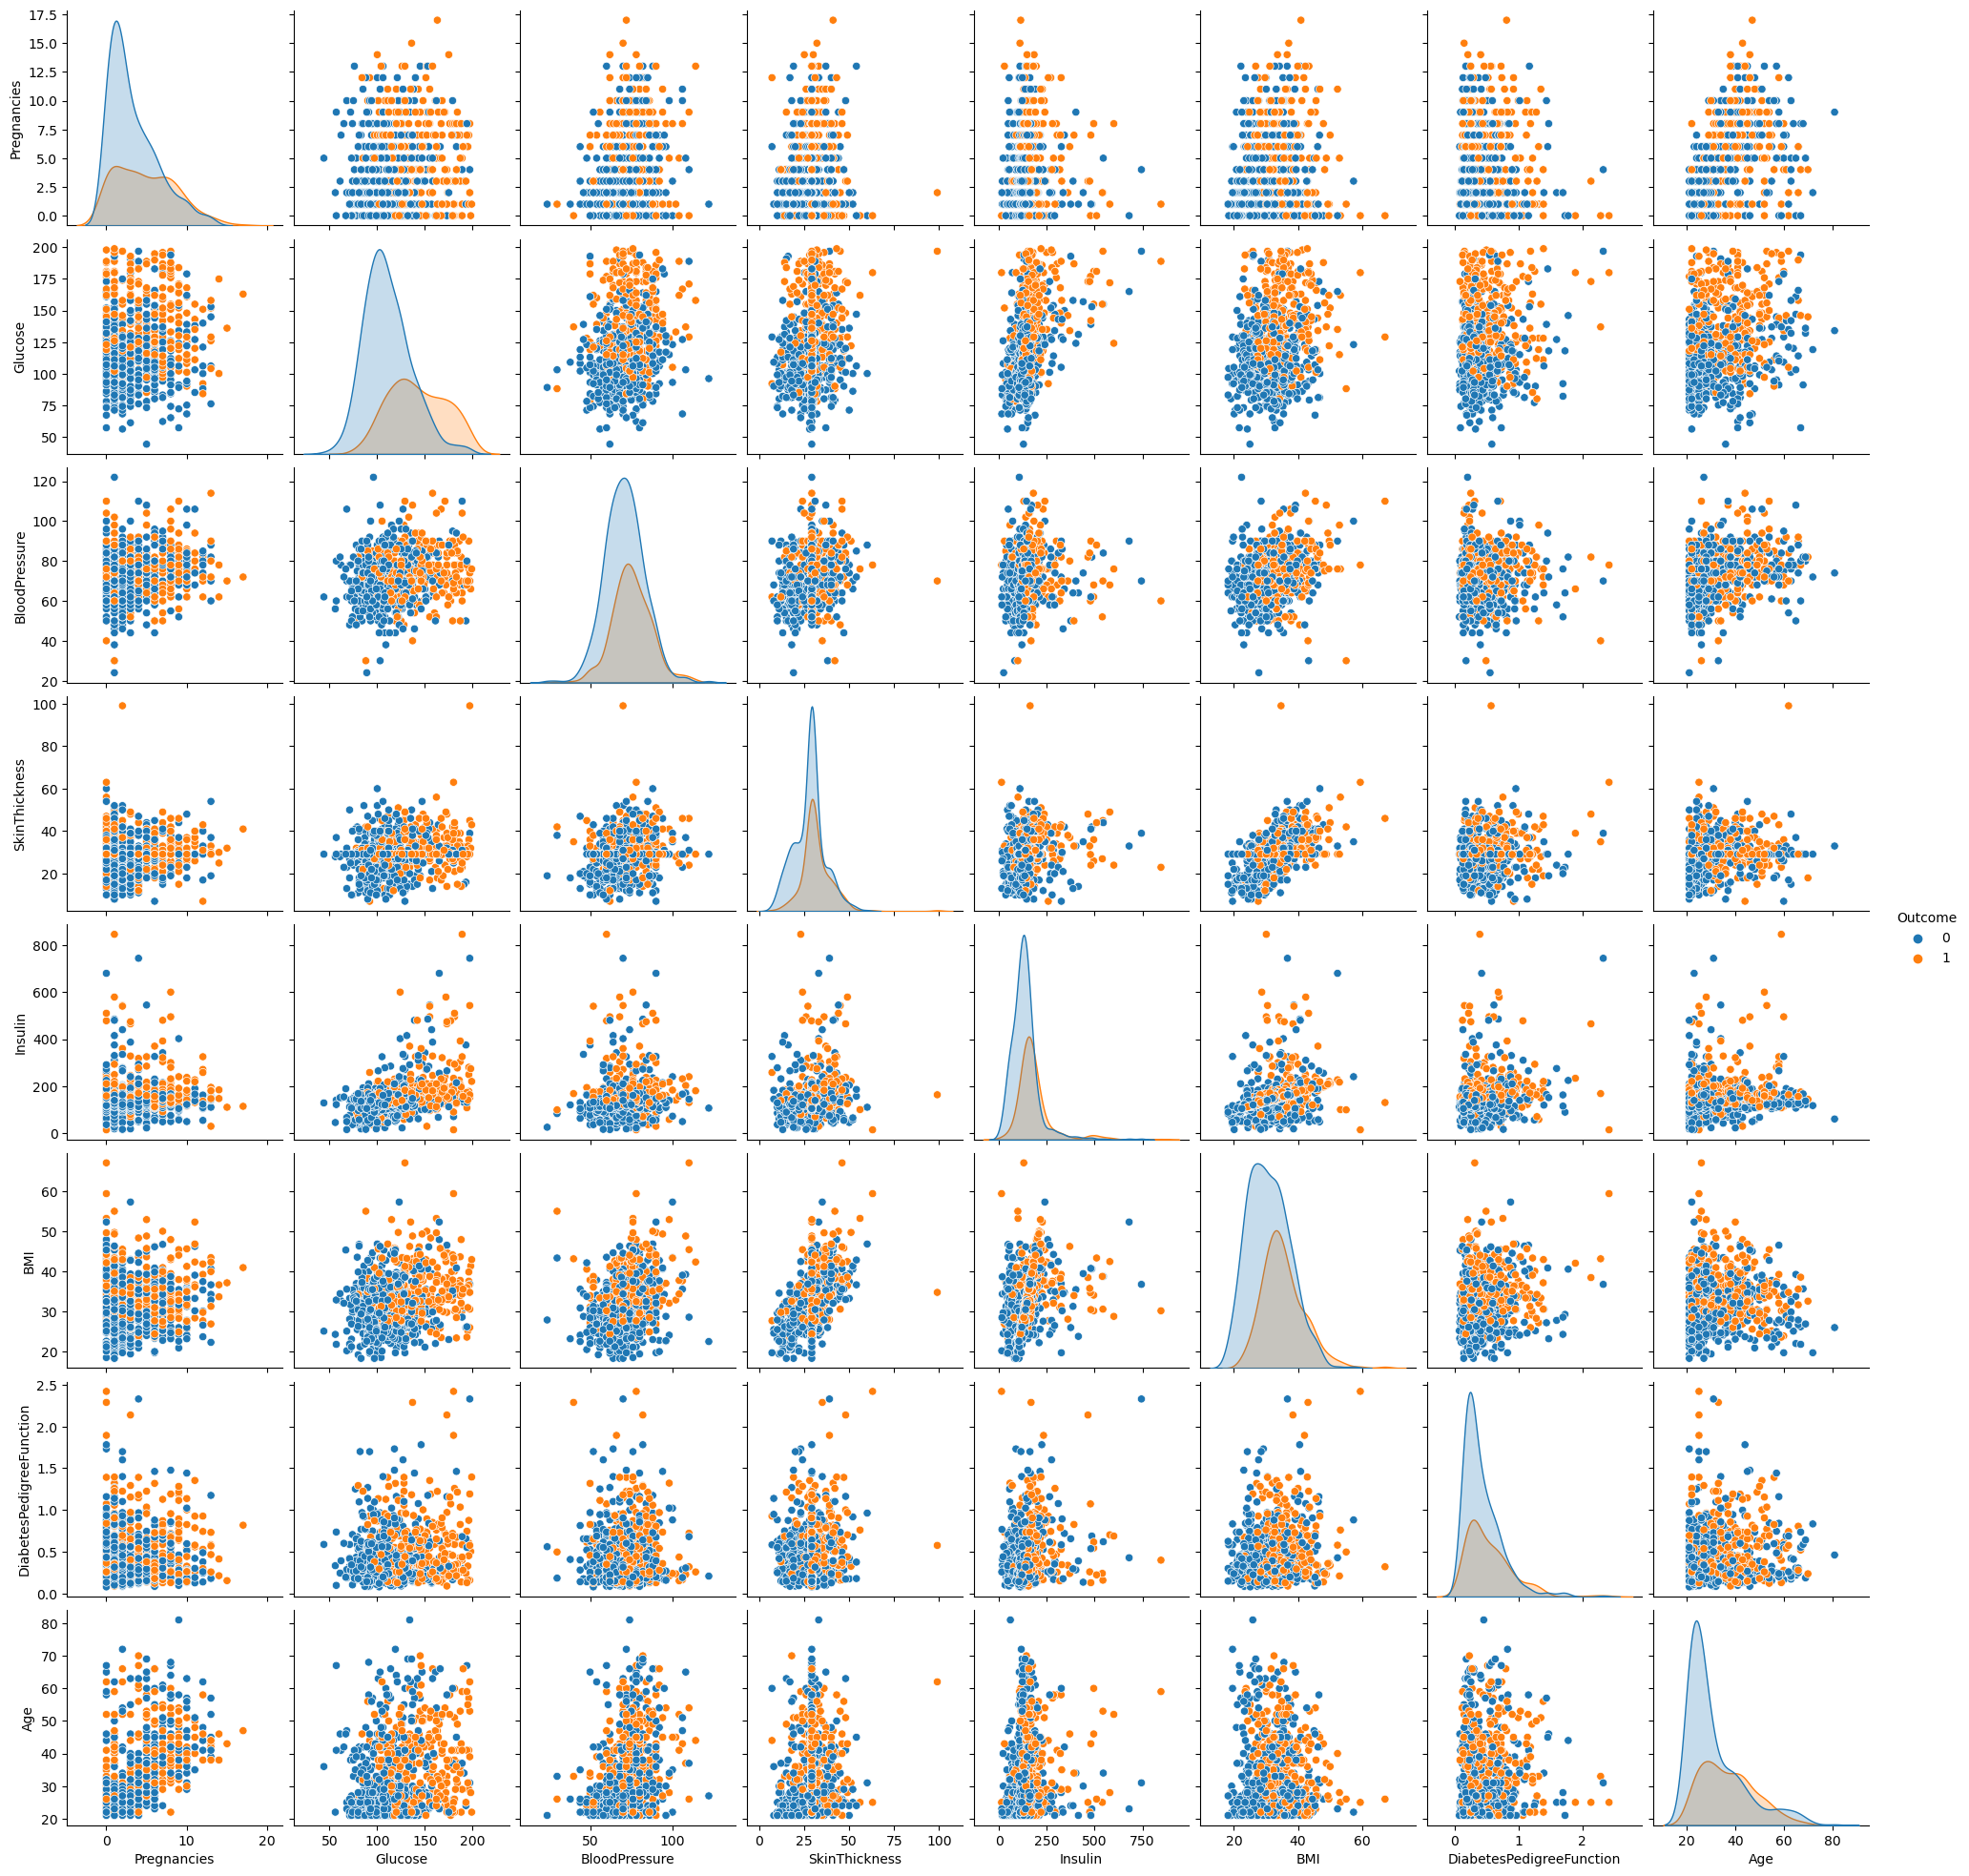

In [154]:
sns.pairplot(df, diag_kind='kde', hue='Outcome');

- [B] **Boxplot**

In [155]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [156]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
label = ['Outcome']

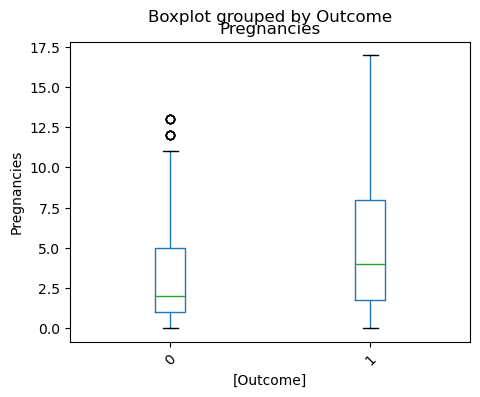

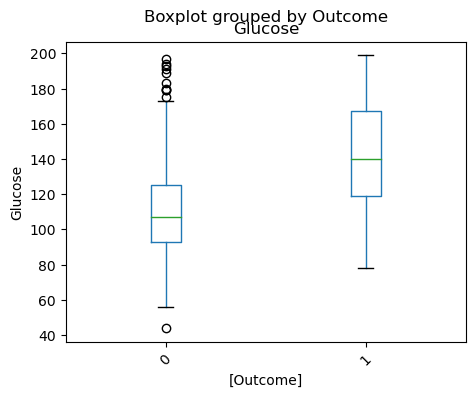

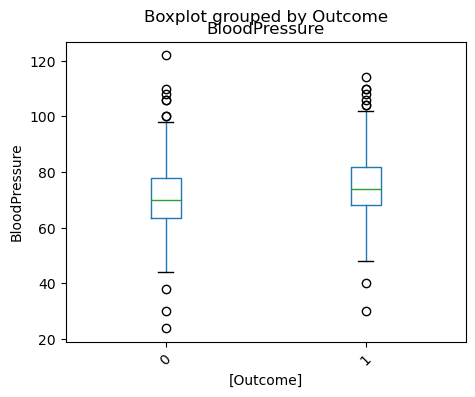

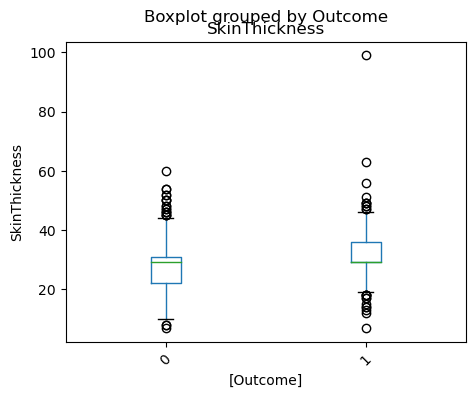

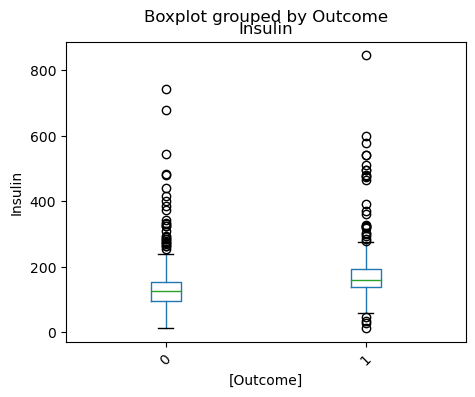

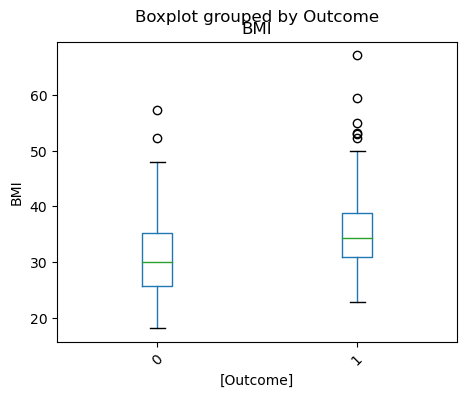

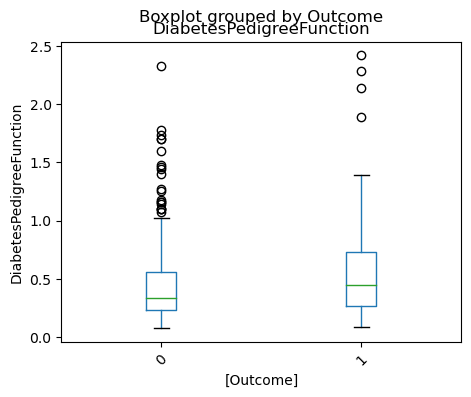

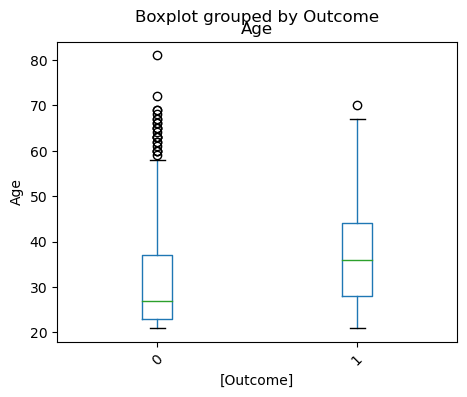

In [157]:
for i in range(len(features)):
    df.boxplot(column = features[i],by = label,grid = False, figsize = (5,4), rot = 45)
    plt.ylabel(features[i])
    plt.show()

## [11] Confidence values and hypothesis testing

- [A] **Glucose**

In [158]:
import researchpy as rp

In [159]:
rp.ttest(group1= df['Glucose'][df['Outcome'] == 1], group1_name= "Diabetes",
         group2= df['Glucose'][df['Outcome'] == 0], group2_name= "NotDiabetes")

(      Variable      N        Mean         SD        SE   95% Conf.    Interval
 0     Diabetes  268.0  142.235075  29.504789  1.802292  138.686563  145.783586
 1  NotDiabetes  500.0  110.614000  24.705642  1.104870  108.443230  112.784770
 2     combined  768.0  121.648438  30.456470  1.099003  119.491026  123.805849,
                        Independent t-test   results
 0  Difference (Diabetes - NotDiabetes) =    31.6211
 1                   Degrees of freedom =   766.0000
 2                                    t =    15.7751
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     1.0000
 5               Difference > 0 p value =     0.0000
 6                            Cohen's d =     1.1943
 7                            Hedge's g =     1.1931
 8                       Glass's delta1 =     1.0717
 9                     Point-Biserial r =     0.4952)

- There is evidence to suggest that the average blood glucsoe concentration for diabetics M=142.15 (95% CI: 138.61, 145.71) was higher than non-diabetics, M=110.71 (95% CI: 108.53, 112.87); t(766)= 15.67, p < 0.000 at the 95% confidence level (using independent t-test)

- **H0 : Avg. Glucose level of people who have diabetes = Avg. Glucose level of people who dont have diabetes**
- **H1 : Avg. Glucose level of people who have diabetes > Avg. Glucose level of people who dont have diabetes**

- LEFT TAIL TEST


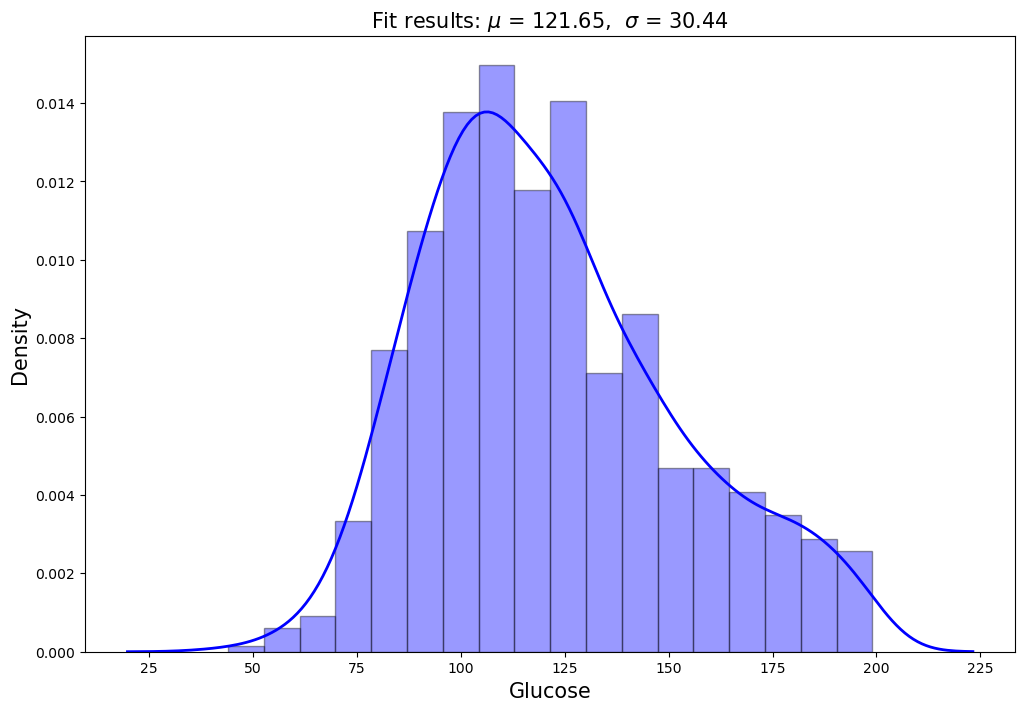

In [160]:
mu, std = norm.fit(df['Glucose'])
plt.figure(figsize = [12, 8])
sns.distplot(df['Glucose'], hist=True, kde=True
             , color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("Glucose", size=15)
plt.ylabel("Density", size=15);

In [161]:
### Using stats library
stats.ttest_ind(df['Glucose'][df['Outcome'] == 1],
                df['Glucose'][df['Outcome'] == 0])

Ttest_indResult(statistic=15.775137461670715, pvalue=9.334344760844454e-49)

- p value < alpha , We have enough evidence to reject null hypothesis.

- [B] **Blood Pressure**

In [162]:
rp.ttest(group1= df['BloodPressure'][df['Outcome'] == 1], group1_name= "Diabetes",
         group2= df['BloodPressure'][df['Outcome'] == 0], group2_name= "NotDiabetes")

(      Variable      N       Mean         SD        SE  95% Conf.   Interval
 0     Diabetes  268.0  75.111940  11.988859  0.732336  73.670052  76.553829
 1  NotDiabetes  500.0  70.832000  11.964869  0.535085  69.780702  71.883298
 2     combined  768.0  72.325521  12.138307  0.438003  71.465693  73.185349,
                        Independent t-test   results
 0  Difference (Diabetes - NotDiabetes) =     4.2799
 1                   Degrees of freedom =   766.0000
 2                                    t =     4.7217
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     1.0000
 5               Difference > 0 p value =     0.0000
 6                            Cohen's d =     0.3575
 7                            Hedge's g =     0.3571
 8                       Glass's delta1 =     0.3570
 9                     Point-Biserial r =     0.1682)

- **H0 : Avg. BP of people who have diabetes = Avg. BP of people who do not have diabetes**
- **H1 : Avg. BP of people who have diabetes > Avg. BP of people who do not have diabetes**

- RIGHT TAIL TEST

- **There is evidence to suggest that the average blood pressure for diabetics M=74.95 (95% CI: 73.51, 76.39) was higher than non-diabetics, M=70.81 (95% CI: 69.76, 71.81); t(766)= 4.57, p < 0.000 at the 95% confidence level (using independent t-test)**

- - p value < alpha , We have enough evidence to reject null hypothesis.

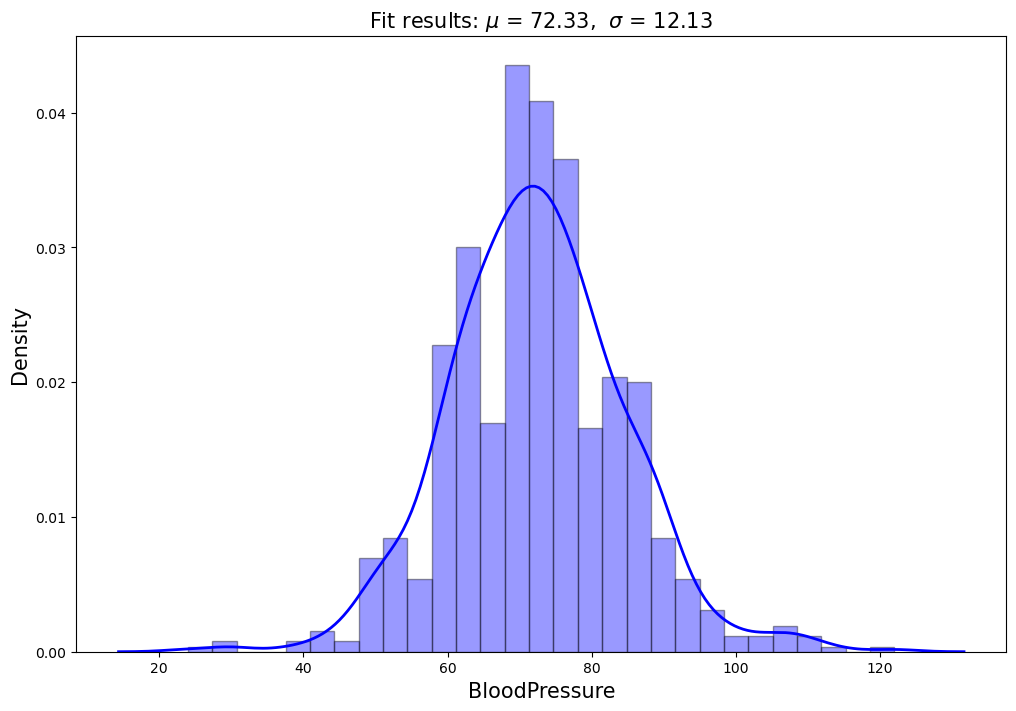

In [163]:
mu, std = norm.fit(df['BloodPressure'])
plt.figure(figsize = [12, 8])
sns.distplot(df['BloodPressure'], hist=True, kde=True
             , color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("BloodPressure", size=15)
plt.ylabel("Density", size=15);

- [C] **Skin Thickness**

In [164]:
rp.ttest(group1= df['SkinThickness'][df['Outcome'] == 1], group1_name= "Diabetes",
         group2= df['SkinThickness'][df['Outcome'] == 0], group2_name= "NotDiabetes")

(      Variable      N       Mean        SD        SE  95% Conf.   Interval
 0     Diabetes  268.0  31.736944  8.647599  0.528236  30.696905  32.776982
 1  NotDiabetes  500.0  27.768651  8.559606  0.382797  27.016558  28.520744
 2     combined  768.0  29.153420  8.790942  0.317216  28.530705  29.776134,
                        Independent t-test   results
 0  Difference (Diabetes - NotDiabetes) =     3.9683
 1                   Degrees of freedom =   766.0000
 2                                    t =     6.1019
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     1.0000
 5               Difference > 0 p value =     0.0000
 6                            Cohen's d =     0.4619
 7                            Hedge's g =     0.4615
 8                       Glass's delta1 =     0.4589
 9                     Point-Biserial r =     0.2153)

- **H0 : Avg.Skin Thickness of people who have diabetes = Avg. Avg.Skin Thickness of people who do not have diabetes**

- **H1 : Avg.Skin Thickness  of people who have diabetes >  Avg.Skin Thickness  of people who do not have diabetes**

- RIGHT TAIL TEST

- There is evidence to suggest that the average Skin Thickness for diabetics M=74.95 (95% CI: 73.51, 76.39) was higher than non-diabetics, M=70.81 (95% CI: 69.76, 71.81); t(766)= 6.101, p < 0.000 at the 95% confidence level (using independent t-test)

- p value < alpha , We have enough evidence to reject null hypothesis.


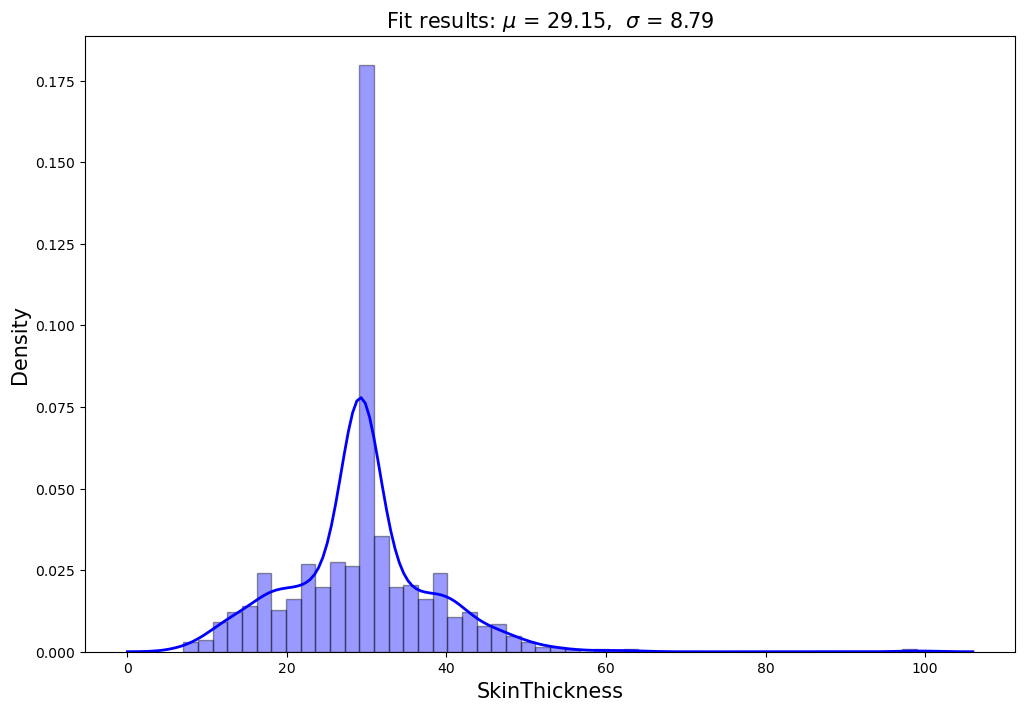

In [165]:
mu, std = norm.fit(df['SkinThickness'])
plt.figure(figsize = [12, 8])
sns.distplot(df['SkinThickness'], hist=True, kde=True
             , color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("SkinThickness", size=15)
plt.ylabel("Density", size=15);

### [D] INSULIN
    

In [166]:
rp.ttest(group1= df['Insulin'][df['Outcome'] == 1], group1_name= "Diabetes",
         group2= df['Insulin'][df['Outcome'] == 0], group2_name= "NotDiabetes")

(      Variable      N        Mean         SD        SE   95% Conf.    Interval
 0     Diabetes  268.0  183.333839  96.862555  5.916822  171.684275  194.983403
 1  NotDiabetes  500.0  134.473803  76.399363  3.416683  127.760945  141.186661
 2     combined  768.0  151.523920  87.215492  3.147118  145.345933  157.701907,
                        Independent t-test   results
 0  Difference (Diabetes - NotDiabetes) =    48.8600
 1                   Degrees of freedom =   766.0000
 2                                    t =     7.6742
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     1.0000
 5               Difference > 0 p value =     0.0000
 6                            Cohen's d =     0.5810
 7                            Hedge's g =     0.5804
 8                       Glass's delta1 =     0.5044
 9                     Point-Biserial r =     0.2672)

- **H0 : Avg.Insulin of people who have diabetes = Avg. Insulin of people who do not have diabetes**

- **H1 : Avg.Insulin of people who have diabetes > Avg. Insulin of people who do not have diabetes**

RIGHT TAIL TEST

There is evidence to suggest that the average Insulin for diabetics M=183.33 (95% CI: 171.684275 194.983403) was higher than non-diabetics, M=134.47 (95% CI: 127.760945  141.186661); t(766)= 7.67, p < 0.000 at the 95% confidence level (using independent t-test)

- p value < alpha , We have enough evidence to reject null hypothesis.

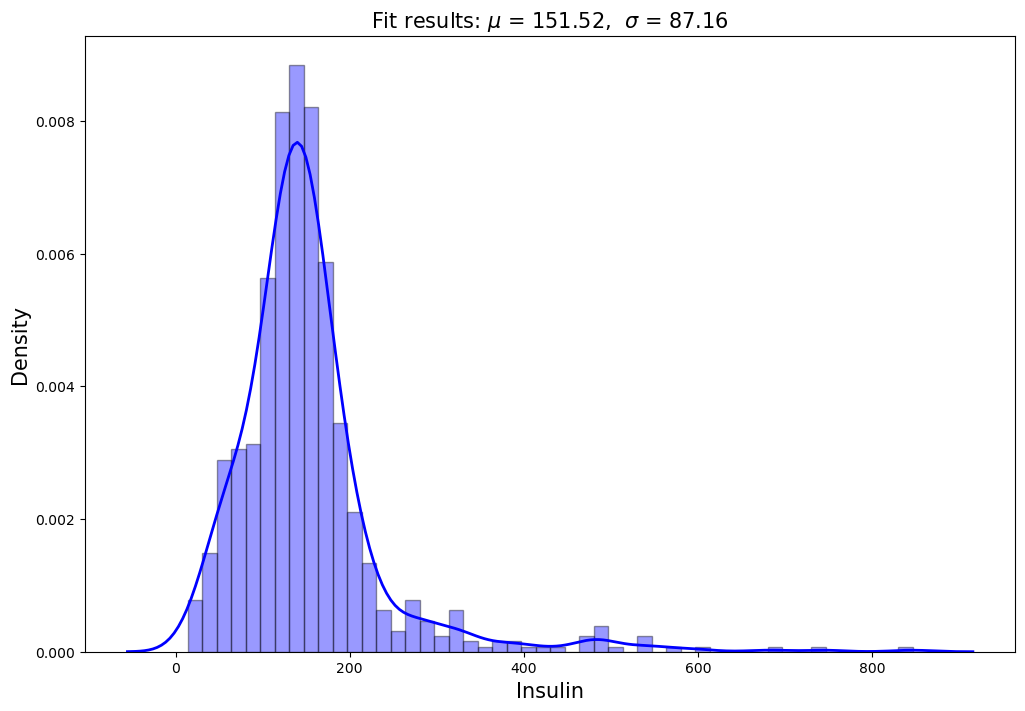

In [167]:
mu, std = norm.fit(df['Insulin'])
plt.figure(figsize = [12, 8])
sns.distplot(df['Insulin'], hist=True, kde=True
             , color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("Insulin", size=15)
plt.ylabel("Density", size=15);

## [E] BMI

In [168]:
rp.ttest(group1= df['BMI'][df['Outcome'] == 1], group1_name= "Diabetes",
         group2= df['BMI'][df['Outcome'] == 0], group2_name= "NotDiabetes")

(      Variable      N       Mean        SD        SE  95% Conf.   Interval
 0     Diabetes  268.0  35.398097  6.595109  0.402860  34.604910  36.191284
 1  NotDiabetes  500.0  30.858220  6.510650  0.291165  30.286159  31.430281
 2     combined  768.0  32.442448  6.885285  0.248451  31.954723  32.930173,
                        Independent t-test   results
 0  Difference (Diabetes - NotDiabetes) =     4.5399
 1                   Degrees of freedom =   766.0000
 2                                    t =     9.1690
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     1.0000
 5               Difference > 0 p value =     0.0000
 6                            Cohen's d =     0.6941
 7                            Hedge's g =     0.6935
 8                       Glass's delta1 =     0.6884
 9                     Point-Biserial r =     0.3145)

- **H0 : Avg.BMI of people who have diabetes = Avg. BMI of people who do not have diabetes**

- **H1 : Avg.BMI of people who have diabetes > Avg. BMI of people who do not have diabetes**

RIGHT TAIL TEST

There is evidence to suggest that the average Insulin for diabetics M=183.33 (95% CI: 34.604910  36.191284) was higher than non-diabetics, M=134.47 (95% CI: 30.286159  31.430281); t(766)= 9.16, p < 0.000 at the 95% confidence level (using independent t-test)

- p value < alpha , We have enough evidence to reject null hypothesis.

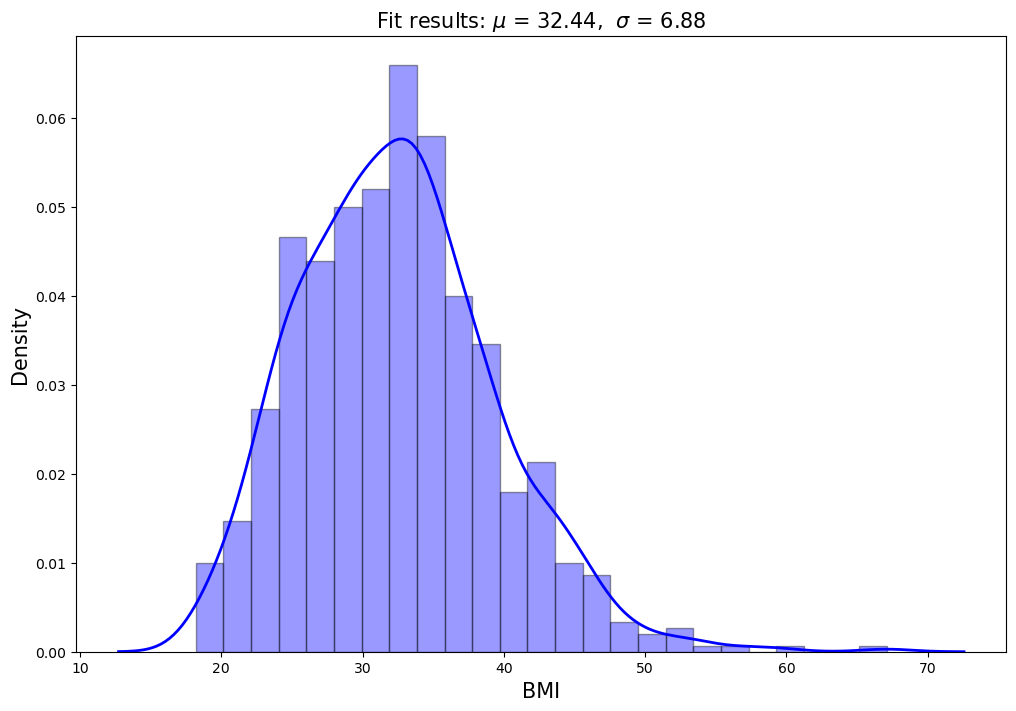

In [169]:
mu, std = norm.fit(df['BMI'])
plt.figure(figsize = [12, 8])
sns.distplot(df['BMI'], hist=True, kde=True
             , color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("BMI", size=15)
plt.ylabel("Density", size=15);

### [F] Diabetes Pedigree Function

In [170]:
rp.ttest(group1= df['DiabetesPedigreeFunction'][df['Outcome'] == 1], group1_name= "Diabetes",
         group2= df['DiabetesPedigreeFunction'][df['Outcome'] == 0], group2_name= "NotDiabetes")

(      Variable      N      Mean        SD        SE  95% Conf.  Interval
 0     Diabetes  268.0  0.550500  0.372354  0.022745   0.505717  0.595283
 1  NotDiabetes  500.0  0.429734  0.299085  0.013376   0.403455  0.456013
 2     combined  768.0  0.471876  0.331329  0.011956   0.448406  0.495346,
                        Independent t-test   results
 0  Difference (Diabetes - NotDiabetes) =     0.1208
 1                   Degrees of freedom =   766.0000
 2                                    t =     4.8858
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     1.0000
 5               Difference > 0 p value =     0.0000
 6                            Cohen's d =     0.3699
 7                            Hedge's g =     0.3695
 8                       Glass's delta1 =     0.3243
 9                     Point-Biserial r =     0.1738)

- **H0 : Avg.Diabetes Pedigree Function of people who have diabetes = Avg. Diabetes Pedigree Function of people who do not have diabetes**

- **H1 : Avg.Diabetes Pedigree Function of people who have diabetes > Avg.Diabetes Pedigree Function of people who do not have diabetes**

RIGHT TAIL TEST

There is evidence to suggest that the average Insulin for diabetics M=183.33 (95% CI: 0.505717  0.595283) was higher than non-diabetics, M=134.47 (95% CI: 0.403455  0.456013); t(766)= 4.88, p < 0.000 at the 95% confidence level (using independent t-test)

- p value < alpha , We have enough evidence to reject null hypothesis.

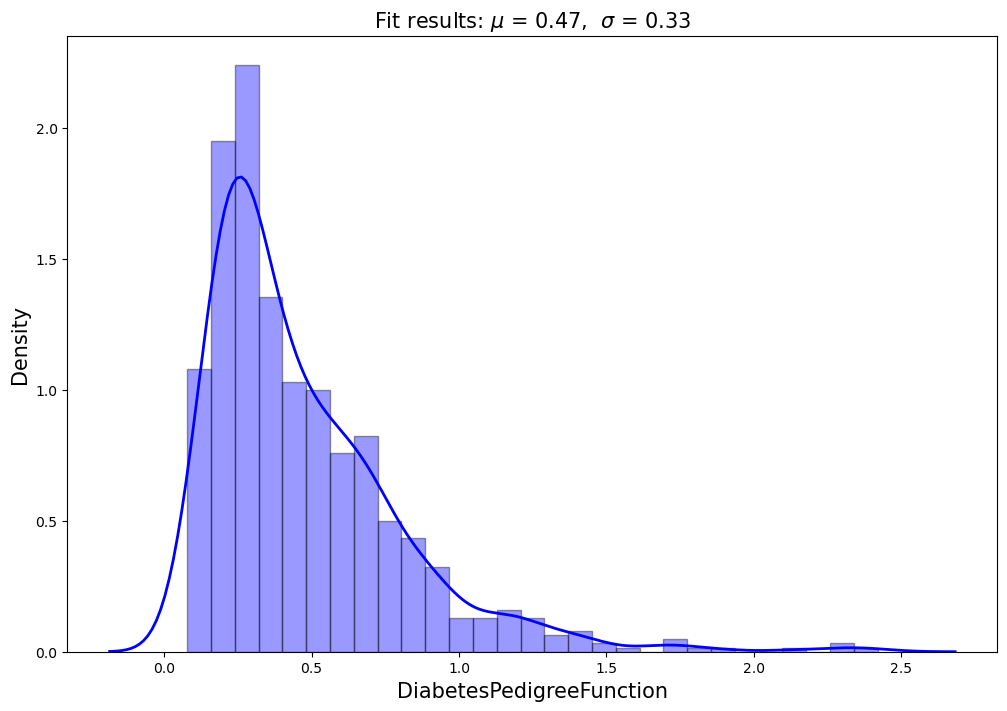

In [171]:
mu, std = norm.fit(df['DiabetesPedigreeFunction'])
plt.figure(figsize = [12, 8])
sns.distplot(df['DiabetesPedigreeFunction'], hist=True, kde=True
             , color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("DiabetesPedigreeFunction", size=15)
plt.ylabel("Density", size=15);

### [G] AGE

In [172]:
rp.ttest(group1= df['Age'][df['Outcome'] == 1], group1_name= "Diabetes",
         group2= df['Age'][df['Outcome'] == 0], group2_name= "NotDiabetes")

(      Variable      N       Mean         SD        SE  95% Conf.   Interval
 0     Diabetes  268.0  37.067164  10.968254  0.669993  35.748023  38.386305
 1  NotDiabetes  500.0  31.190000  11.667655  0.521793  30.164817  32.215183
 2     combined  768.0  33.240885  11.760232  0.424361  32.407839  34.073932,
                        Independent t-test   results
 0  Difference (Diabetes - NotDiabetes) =     5.8772
 1                   Degrees of freedom =   766.0000
 2                                    t =     6.7927
 3                Two side test p value =     0.0000
 4               Difference < 0 p value =     1.0000
 5               Difference > 0 p value =     0.0000
 6                            Cohen's d =     0.5142
 7                            Hedge's g =     0.5137
 8                       Glass's delta1 =     0.5358
 9                     Point-Biserial r =     0.2384)

- **H0 : Avg.Age of people who have diabetes = Avg.Age of people who do not have diabetes**

- **H1 : Avg.Age of people who have diabetes > Avg.Age of people who do not have diabetes**

RIGHT TAIL TEST

There is evidence to suggest that the average Insulin for diabetics M=183.33 (95% CI: 35.748023  38.386305) was higher than non-diabetics, M=134.47 (95% CI:30.164817  32.215183); t(766)=6.79, p < 0.000 at the 95% confidence level (using independent t-test)

- p value < alpha , We have enough evidence to reject null hypothesis.

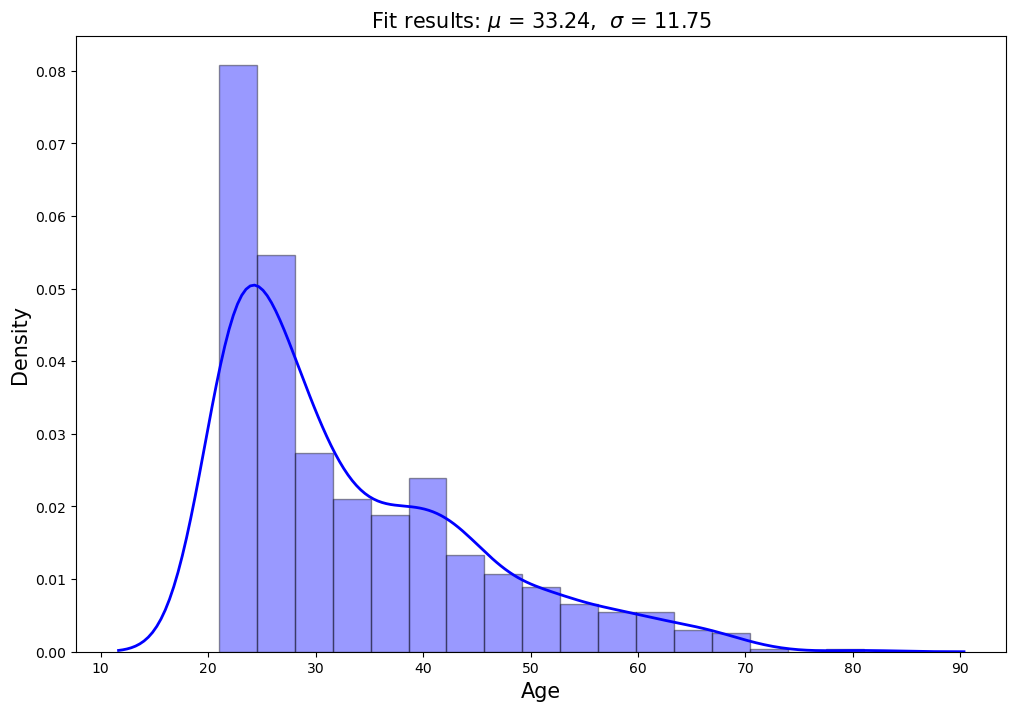

In [173]:
mu, std = norm.fit(df['Age'])
plt.figure(figsize = [12, 8])
sns.distplot(df['Age'], hist=True, kde=True
             , color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Fit results: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("Age", size=15)
plt.ylabel("Density", size=15);

## [12] LOGISTIC MODEL
##  - MODEL 1

In [174]:
y = df['Outcome']
X = df.drop('Outcome', axis=1)
# definine X and y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)
# Splitting the data so 20% is for testing

model = LogisticRegression()
# instantiate the model 

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_predict_train = model.predict(X_train)

model_score = model.score(X_test, y_test)

print(f"R-square : {model_score}")

R-square : 0.7604166666666666


- **CONFUSION MATRIX**

In [175]:
cm=confusion_matrix(y_predict,y_test)
print(cm)

[[106  32]
 [ 14  40]]


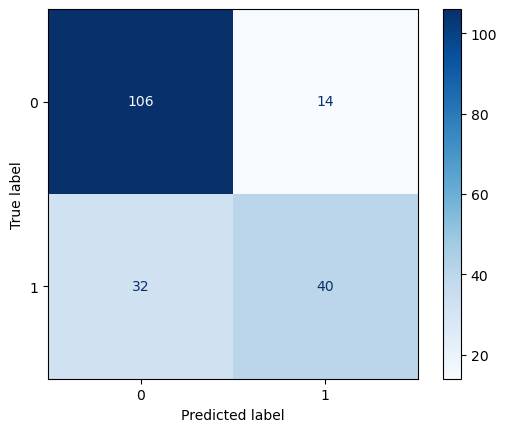

In [176]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues);

### [B]  **PERFORMANCE METRICS**

- **TRAIN DATA**

In [177]:
print(f"precision : {precision_score(y_train,y_predict_train)}")
print(f"Recall : {recall_score(y_train,y_predict_train)}")
print(f"Accuracy : {accuracy_score(y_train,y_predict_train)}")
print(f"F1 Score : {f1_score(y_train,y_predict_train)}")
print(f"Auc score : {roc_auc_score(y_train,y_predict_train)}")

precision : 0.74
Recall : 0.5663265306122449
Accuracy : 0.7847222222222222
F1 Score : 0.6416184971098267
Auc score : 0.7318474758324383


- **TEST DATA**

In [178]:
print(f"precision : {precision_score(y_test,y_predict)}")
print(f"Recall : {recall_score(y_test,y_predict)}")
print(f"Accuracy : {accuracy_score(y_test,y_predict)}")
print(f"F1 Score : {f1_score(y_test,y_predict)}")
print(f"Auc score : {roc_auc_score(y_test,y_predict)}")

precision : 0.7407407407407407
Recall : 0.5555555555555556
Accuracy : 0.7604166666666666
F1 Score : 0.634920634920635
Auc score : 0.7194444444444444


### [C] ROC CURVE

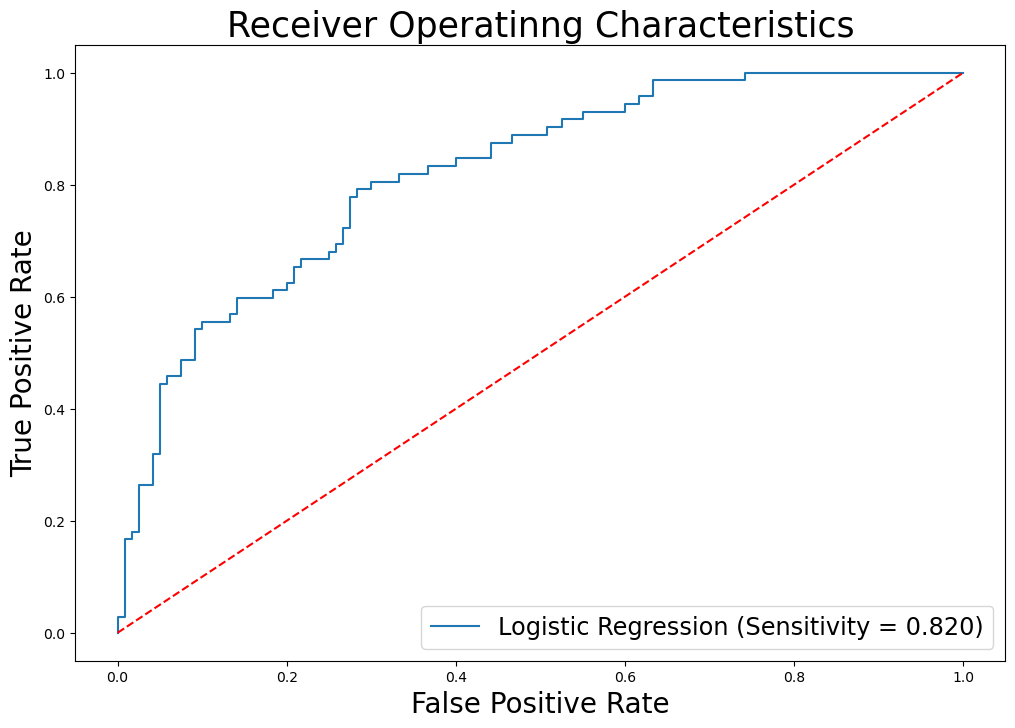

In [179]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Logistic Regression (Sensitivity = %0.3f)" % auc)
plt.legend(loc=4)
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title("Receiver Operatinng Characteristics", size = 25)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4, fontsize='xx-large')
plt.show()
# AUC score for LR model is 0.820

### [D] CLASS WISE PERFORMANCE

In [180]:
report = classification_report(y_test,y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       120
           1       0.74      0.56      0.63        72

    accuracy                           0.76       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.76      0.76      0.75       192



### [E] Feature importance
- feature importance is on basis of coefficient

In [181]:
model.coef_

array([[ 1.48687535e-01,  3.52937914e-02, -1.95698772e-02,
        -1.11236594e-02,  2.02997099e-04,  8.86662892e-02,
         1.12517113e+00,  3.66736905e-03]])

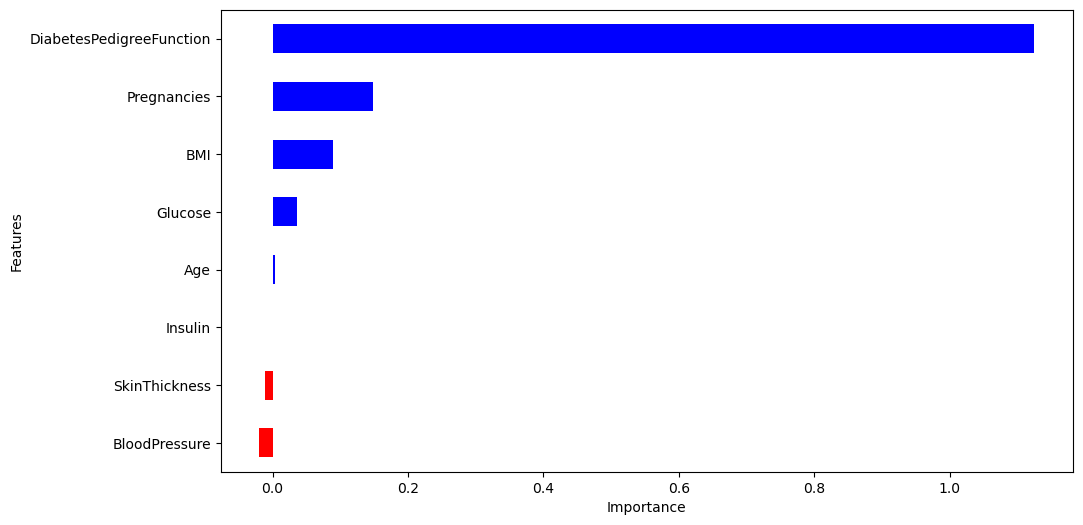

In [182]:
coeff = list(model.coef_[0])
labels = list(X_test.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance');

## - [Model 2]
### Fit another model on basis of just above important features

In [183]:
df.drop(['BloodPressure','SkinThickness','Insulin'], axis = 1, inplace=True)

# Dropping all columns except DiabetesPedigreeFunction, BMI, Glucose and Age are key variables we will 
# do another LR with only these parameters.

In [184]:
y = df['Outcome']
X = df.drop('Outcome', axis=1)
# definine X and y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)
# Splitting the data so 20% is for testing

model = LogisticRegression()
# instantiate the model 

model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_predict_train = model.predict(X_train)

model_score = model.score(X_test, y_test)

print(f"R-square : {model_score}")

R-square : 0.734375


- **CONFUSION MATRIX**

In [185]:
cm=confusion_matrix(y_predict,y_test)
print(cm)

[[103  34]
 [ 17  38]]


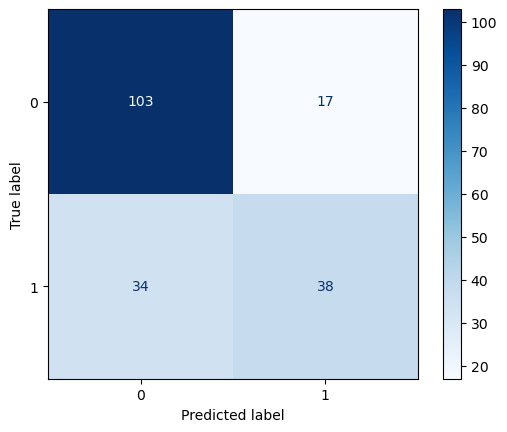

In [186]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues);

### [B]  **PERFORMANCE METRICS**

- **TRAIN DATA**

In [187]:
print(f"precision : {precision_score(y_train,y_predict_train)}")
print(f"Recall : {recall_score(y_train,y_predict_train)}")
print(f"Accuracy : {accuracy_score(y_train,y_predict_train)}")
print(f"F1 Score : {f1_score(y_train,y_predict_train)}")
print(f"Auc score : {roc_auc_score(y_train,y_predict_train)}")

precision : 0.7483870967741936
Recall : 0.5918367346938775
Accuracy : 0.7934027777777778
F1 Score : 0.6609686609686609
Auc score : 0.7446025778732546


- **TEST DATA**

In [188]:
print(f"precision : {precision_score(y_test,y_predict)}")
print(f"Recall : {recall_score(y_test,y_predict)}")
print(f"Accuracy : {accuracy_score(y_test,y_predict)}")
print(f"F1 Score : {f1_score(y_test,y_predict)}")
print(f"Auc score : {roc_auc_score(y_test,y_predict)}")

precision : 0.6909090909090909
Recall : 0.5277777777777778
Accuracy : 0.734375
F1 Score : 0.5984251968503937
Auc score : 0.6930555555555555


### [C] ROC CURVE

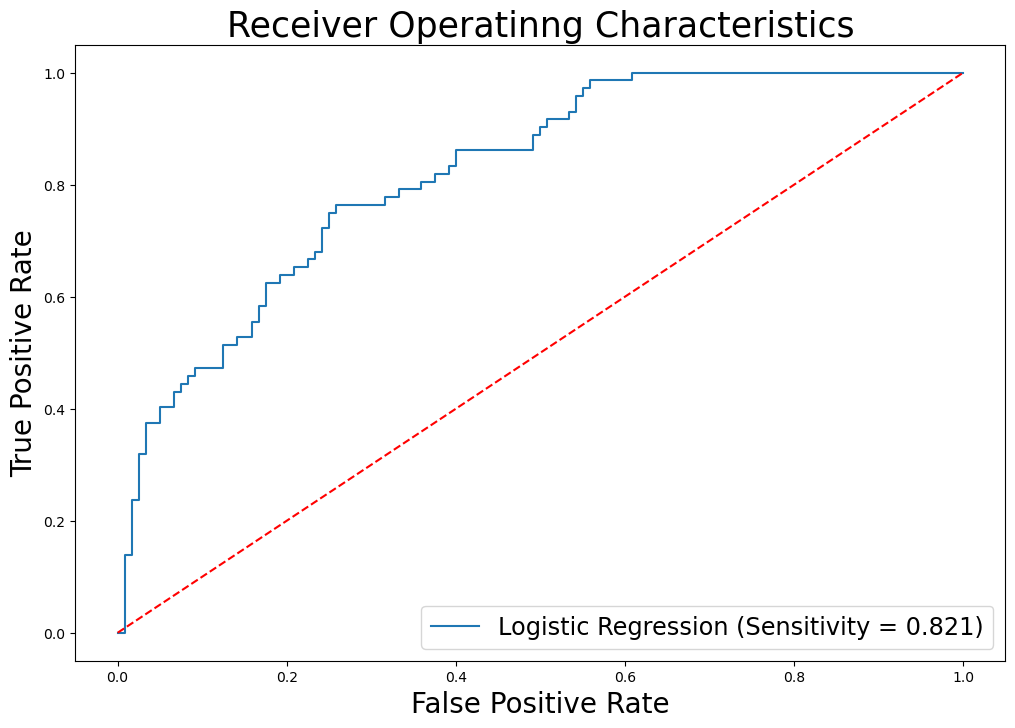

In [189]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Logistic Regression (Sensitivity = %0.3f)" % auc)
plt.legend(loc=4)
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title("Receiver Operatinng Characteristics", size = 25)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4, fontsize='xx-large')
plt.show()
# AUC score for LR model is 0.820

### [D] CLASS WISE PERFORMANCE

In [190]:
report = classification_report(y_test,y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       120
           1       0.69      0.53      0.60        72

    accuracy                           0.73       192
   macro avg       0.72      0.69      0.70       192
weighted avg       0.73      0.73      0.73       192



### [E] Feature importance
- feature importance is on basis of coefficient

In [191]:
model.coef_

array([[0.12346148, 0.03732333, 0.08822687, 0.86552045, 0.01140069]])

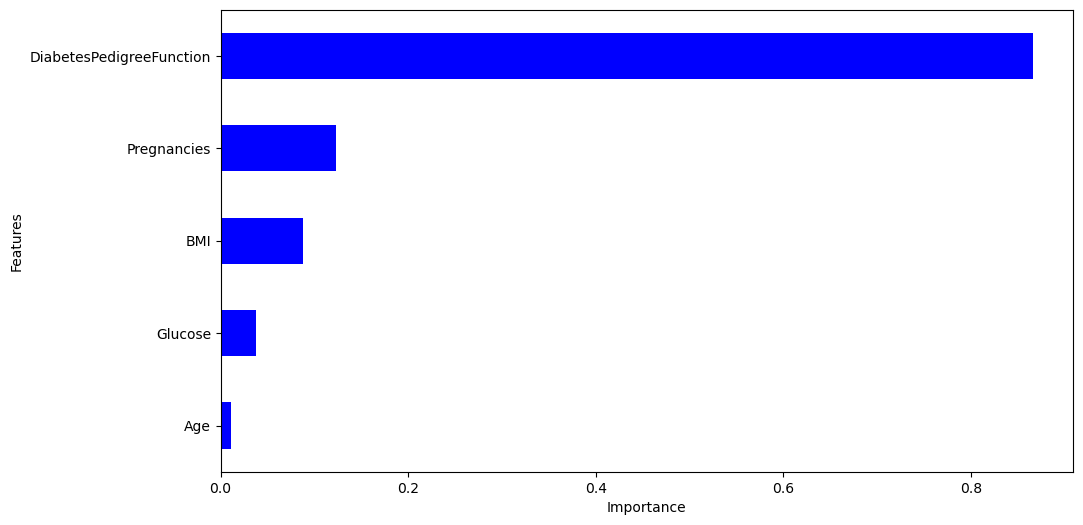

In [192]:
coeff = list(model.coef_[0])
labels = list(X_test.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance');

## [13] KNN

In [193]:
# def best_k_for_knn(X_train, X_test, y_train, y_test,max_no_of_neighbors):
#     for i in range(1,max_no_of_neighbors):
#         knn=KNeighborsClassifier(n_neighbors=i)
#         knn.fit(X_train,y_train)
#         y_pred=knn.predict(X_test)
#         print("------------------For Neighbours= ",i,"------------------------")
#         print("\nConfusion Matrix is:\n",confusion_matrix(y_test,y_pred))

#         print("\nPrecision Score is:\n",precision_score(y_test,y_pred))
#         print("\nRecall Score is:\n",recall_score(y_test,y_pred))
#         print("\nAccuracy Score is:\n",accuracy_score(y_test,y_pred))
#         print("\nF1 Score is:\n",f1_score(y_test,y_pred))
#         print("\n Auc score is :\n" ,roc_auc_score(y_test,knn.predict_proba(X_test)[:,1]))

In [194]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

def best_k_for_knn(X_train, X_test, y_train, y_test, max_no_of_neighbors):
    precision_scores = []
    recall_scores = []
    accuracy_scores = []
    auc_score = []
    k_values = []

    for i in range(1, max_no_of_neighbors):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        k_values.append(i)
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        auc_score.append(roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]))
        print("------------------For Neighbours =", i, "------------------------")
        print("\nConfusion Matrix is:\n", confusion_matrix(y_test, y_pred))
        print("\nPrecision Score is:\n", precision_score(y_test, y_pred))
        print("\nRecall Score is:\n", recall_score(y_test, y_pred))
        print("\nAccuracy Score is:\n", accuracy_score(y_test, y_pred))
        print("\nF1 Score is:\n", f1_score(y_test, y_pred))
        print("\nAUC score is:\n", roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]))

    # Plotting precision, recall, and accuracy
    plt.plot(k_values, precision_scores, label='Precision')
    plt.plot(k_values, recall_scores, label='Recall')
    plt.plot(k_values, accuracy_scores, label='Accuracy')
    plt.plot(k_values, auc_score , label ='AUC Score')
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Score')
    plt.title('Performance Metrics vs. Number of Neighbors')
    plt.legend()
    plt.show()


------------------For Neighbours = 1 ------------------------

Confusion Matrix is:
 [[103  17]
 [ 31  41]]

Precision Score is:
 0.7068965517241379

Recall Score is:
 0.5694444444444444

Accuracy Score is:
 0.75

F1 Score is:
 0.6307692307692307

AUC score is:
 0.7138888888888889
------------------For Neighbours = 2 ------------------------

Confusion Matrix is:
 [[109  11]
 [ 44  28]]

Precision Score is:
 0.717948717948718

Recall Score is:
 0.3888888888888889

Accuracy Score is:
 0.7135416666666666

F1 Score is:
 0.5045045045045045

AUC score is:
 0.7528356481481483
------------------For Neighbours = 3 ------------------------

Confusion Matrix is:
 [[104  16]
 [ 30  42]]

Precision Score is:
 0.7241379310344828

Recall Score is:
 0.5833333333333334

Accuracy Score is:
 0.7604166666666666

F1 Score is:
 0.6461538461538462

AUC score is:
 0.7643518518518518
------------------For Neighbours = 4 ------------------------

Confusion Matrix is:
 [[109  11]
 [ 40  32]]

Precision Score is

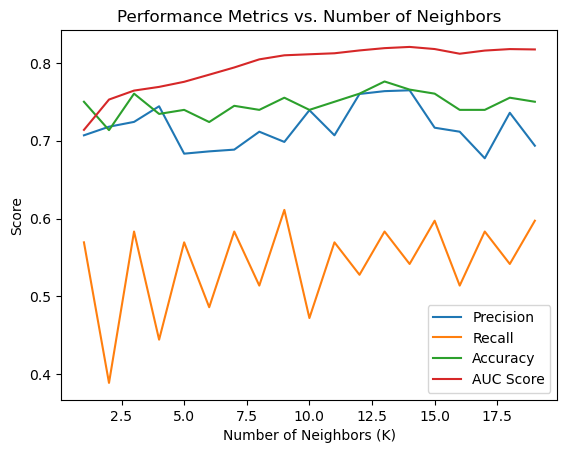

In [195]:
best_k_for_knn(X_train, X_test, y_train, y_test,20)

- **PRECISION**
 - Out of total times it predictive positive, it predicted correct positive.
  PRECISION = TP/TP+FP
  False Positive is incorrectly predicting positive.
  Person didnt had diabetes but saying it has diabetes.
  **MORE SEVERE IS SAYING DIABETIC AS NON DIABETIC**
  Therefore Recall is more important.
 
- **RECALL**
 - Out of actual no. of positive , it predicted correct positive.
 **Predicting Diabetic as Diabetic**
 RECALL = TP/TP+FN
 False Negative is , incorrectly predicting as negative.
 Actual had diabetes but saying didnt have diabetes.
 so, Recall has to be high. therefore k = 9
 
    

#### Plot ROC for for k = 9 

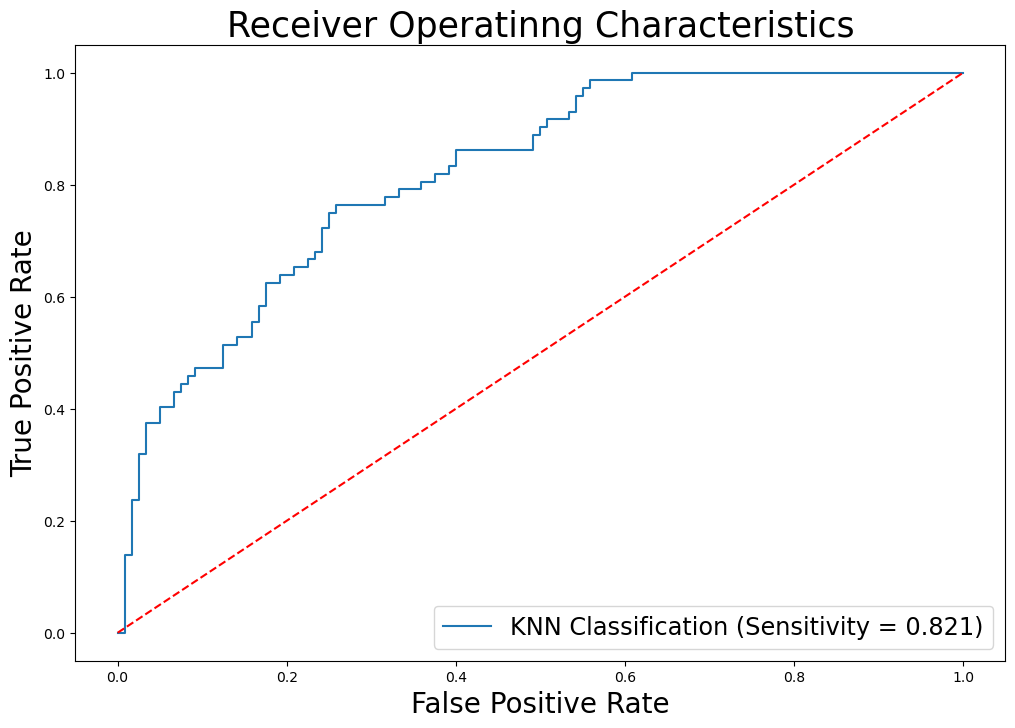

In [196]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="KNN Classification (Sensitivity = %0.3f)" % auc)
plt.legend(loc=4)
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title("Receiver Operatinng Characteristics", size = 25)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4, fontsize='xx-large')
plt.show()
# AUC score for LR model is 0.820

In [ ]:
------------------For Neighbours = 9 ------------------------

Confusion Matrix is:
 [[101  19]
 [ 28  44]]

Precision Score is:
 0.6984126984126984

Recall Score is:
 0.6111111111111112

Accuracy Score is:
 0.7552083333333334

F1 Score is:
 0.6518518518518519

AUC score is:
 0.8096643518518518

## [14] DECISION TREE

In [200]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

def best_depth_for_dt(X_train, X_test, y_train, y_test, max_no_of_neighbors):
    precision_scores = []
    recall_scores = []
    accuracy_scores = []
    depth_values = []
    auc_score = []
    for i in range(1, max_no_of_neighbors):
        dtree = DecisionTreeClassifier(max_depth=i, criterion='gini')
        dtree.fit(X_train, y_train)
        y_pred = dtree.predict(X_test)

        depth_values.append(i)
        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        auc_score.append(roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]))

        print("------------------For Depth =", i, "------------------------")
        print("\nConfusion Matrix is:\n", confusion_matrix(y_test, y_pred))
        print("\nPrecision Score is:\n", precision_score(y_test, y_pred))
        print("\nRecall Score is:\n", recall_score(y_test, y_pred))
        print("\nAccuracy Score is:\n", accuracy_score(y_test, y_pred))
        print("\nF1 Score is:\n", f1_score(y_test, y_pred))
        print("\nAUC score is:\n", roc_auc_score(y_test, dtree.predict_proba(X_test)[:, 1]))

    # Plotting precision, recall, and accuracy
    plt.plot(depth_values, precision_scores, label='Precision')
    plt.plot(depth_values, recall_scores, label='Recall')
    plt.plot(depth_values, accuracy_scores, label='Accuracy')
    plt.plot(depth_values, auc_score, label='AUC SCORE')

    plt.xlabel('Depth')
    plt.ylabel('Score')
    plt.title('Performance Metrics vs. Depth')
    plt.legend()
    plt.show()


------------------For Depth = 1 ------------------------

Confusion Matrix is:
 [[105  15]
 [ 43  29]]

Precision Score is:
 0.6590909090909091

Recall Score is:
 0.4027777777777778

Accuracy Score is:
 0.6979166666666666

F1 Score is:
 0.5

AUC score is:
 0.6388888888888888
------------------For Depth = 2 ------------------------

Confusion Matrix is:
 [[109  11]
 [ 47  25]]

Precision Score is:
 0.6944444444444444

Recall Score is:
 0.3472222222222222

Accuracy Score is:
 0.6979166666666666

F1 Score is:
 0.462962962962963

AUC score is:
 0.6996527777777778
------------------For Depth = 3 ------------------------

Confusion Matrix is:
 [[105  15]
 [ 43  29]]

Precision Score is:
 0.6590909090909091

Recall Score is:
 0.4027777777777778

Accuracy Score is:
 0.6979166666666666

F1 Score is:
 0.5

AUC score is:
 0.743287037037037
------------------For Depth = 4 ------------------------

Confusion Matrix is:
 [[90 30]
 [29 43]]

Precision Score is:
 0.589041095890411

Recall Score is:
 0

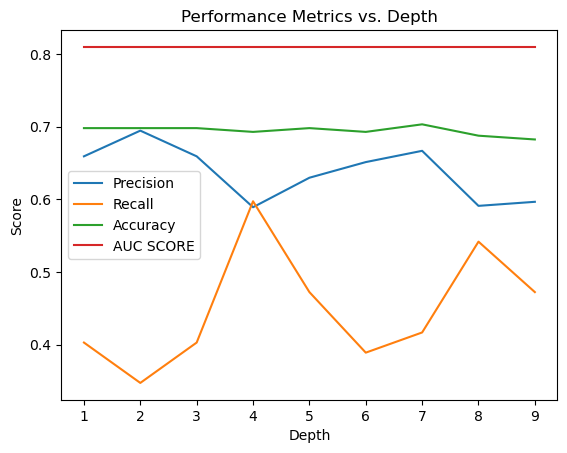

In [201]:
best_depth_for_dt(X_train, X_test, y_train, y_test,10)

- **Depth = 4 gives us best Recall**

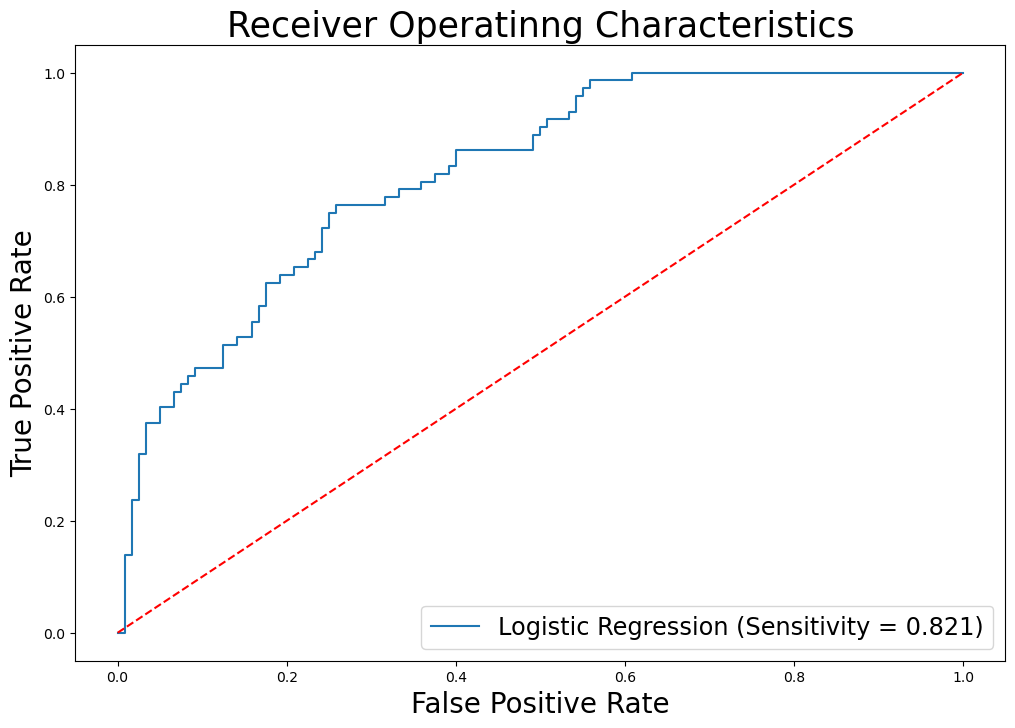

In [202]:
dtree = DecisionTreeClassifier(max_depth=4, criterion='gini')
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Logistic Regression (Sensitivity = %0.3f)" % auc)
plt.legend(loc=4)
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)
plt.title("Receiver Operatinng Characteristics", size = 25)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4, fontsize='xx-large')
plt.show()
# AUC score for DT model is 0.821

 **FOR DEPTH =4**
Confusion Matrix is:
 [[90 30]
 [29 43]]

Precision Score is:
 0.589041095890411

Recall Score is:
 0.5972222222222222

Accuracy Score is:
 0.6927083333333334

F1 Score is:
 0.593103448275862

AUC score is:
 0.7579861111111111